In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.3MB/s]
 98% 534M/543M [00:03<00:00, 146MB/s]
100% 543M/543M [00:03<00:00, 150MB/s]
 96% 259M/271M [00:03<00:00, 88.8MB/s]
100% 271M/271M [00:03<00:00, 74.1MB/s]


In [ ]:
!ls

kaggle.json  sample_data  sampleSubmission.csv	test1.zip  train.zip


In [ ]:
!pwd

/content


In [ ]:
import os
os.mkdir('data/')

In [ ]:
baseDir = 'data/'


In [ ]:
import zipfile
with zipfile.ZipFile('train.zip') as trainzip:
    trainzip.extractall(baseDir)


In [ ]:
with zipfile.ZipFile('test1.zip') as testzip:
    testzip.extractall(baseDir)

In [ ]:
ls

data/  kaggle.json  sample_data/  sampleSubmission.csv  test1.zip  train.zip


In [ ]:
import glob
import shutil
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def data_list_gen(dir):
    File_name, label = [], []
    for file_n in os.listdir(dir):
        file_n=file_n.split('.jpg')[0]
        File_name.append(file_n)
        label.append(file_n.split('.')[0])

    data_list = pd.DataFrame({'File_name':File_name, 'label':label})
    return data_list

In [ ]:
train_list=glob.glob(r'data/train/*.jpg')
len(train_list)

25000

In [ ]:
train_list[0]

'data/train/dog.3909.jpg'

In [ ]:
train_data = data_list_gen(r'data/train/')

In [ ]:
train_data

,File_name,label
0,dog.3909,dog
1,dog.7972,dog
2,dog.5141,dog
3,cat.5793,cat
4,dog.7842,dog
...,...,...
24995,dog.5308,dog
24996,cat.2979,cat
24997,dog.569,dog
24998,dog.8001,dog


In [ ]:
train_data.to_csv('final.csv', header=False, index=False) 

In [ ]:
! cp final.csv data/

In [ ]:
#NOW TRAINING SECTION 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
import os
import pandas as pd
import sys
from collections import Counter
from pathlib import Path
import numpy

In [ ]:
#getting necessary  transforms with out dataset
tfms =get_transforms(do_flip = True,
                                #  flip_vert=True, 
                                 max_lighting=0.1, 
                                 max_zoom=1.05,
                                 max_warp=0.,
                                 max_rotate=15,
                                 p_affine=0.75,
                                 p_lighting=0.75
                                )
#path equal to directory which contains the  images , and a labels csv file
path=r'data/'

In [ ]:
# get_transforms??

In [ ]:
src = (ImageList.from_csv(path, 'final.csv', folder='train', suffix='.jpg',header=None)
       .split_by_rand_pct(0.1)
       .label_from_df(cols=1))

#run these instead of above if you have preprocessed the data and made seperate images folder for each label
# path=r'/home/uzair/Desktop/organized_data_plants/'
# src=(ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
#         .split_by_rand_pct(0.2)             #How to split in train/valid? -> use the folders
#         .label_from_folder() )           #How to label? -> depending on the folder of the filenames
                       

In [ ]:
#creating a databunch
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))
data.batch_size=8

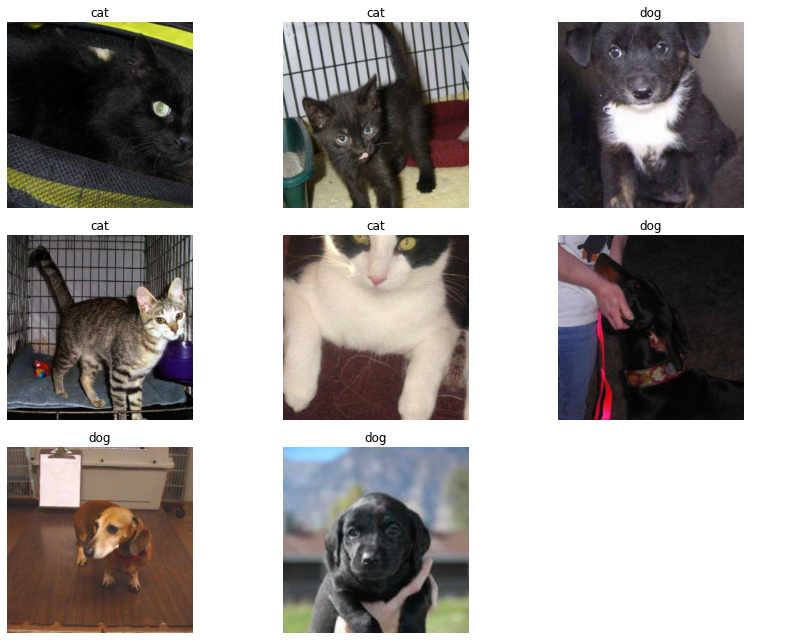

In [ ]:
#displaying the data
data.show_batch(rows=3, figsize=(12,9))

In [ ]:
#choosing the model , and metrics to display while training
# learn = cnn_learner(data, models.densenet121, metrics=[accuracy,error_rate])
#choosing the model , and metrics to display while training
# learn = cnn_learner(data, models.densenet121, metrics=[accuracy,error_rate])
!pip install efficientnet-pytorch
from efficientnet_pytorch import EfficientNet


  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=fd62d795961eb752d39427e539d264231e87035ca724fdaa82cfd9464783e55c
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b2')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b2-8bb594d6.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b2-8bb594d6.pth



Loaded pretrained weights for efficientnet-b2


In [ ]:
model

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=

In [ ]:
model._fc = nn.Linear(1408, data.c)

In [ ]:
learn = Learner(data, model,metrics=[accuracy,error_rate])

In [ ]:
data

ImageDataBunch;

Train: LabelList (22500 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
dog,dog,dog,cat,dog
Path: data;

Valid: LabelList (2500 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
cat,dog,dog,dog,dog
Path: data;

Test: None

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.07E-04
Min loss divided by 10: 3.44E-04


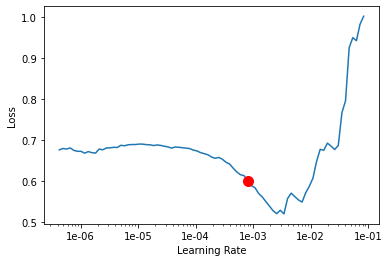

In [ ]:
#auto-learning rate finder, works sometime ......but not always
learn.lr_find(start_lr=1e-07,end_lr=0.2) 
learn.recorder.plot(suggestion=True)


In [ ]:
mingradlr = learn.recorder.min_grad_lr

In [ ]:
# lr = mingradlr
#TRAINING FOR 13 EPOCHS
learn.fit_one_cycle(15 ,slice(3e-05))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.197269,0.148392,0.980400,0.019600,07:18
1,0.103787,0.044633,0.990800,0.009200,07:16
2,0.075270,0.022791,0.994000,0.006000,07:17
3,0.053108,0.017985,0.994400,0.005600,07:20
4,0.032007,0.016947,0.994400,0.005600,07:19
5,0.025587,0.017005,0.994800,0.005200,07:20
6,0.025798,0.016799,0.995600,0.004400,07:17
7,0.015875,0.018892,0.994400,0.005600,07:16
8,0.010393,0.018943,0.994000,0.006000,07:17
9,0.005585,0.018142,0.994800,0.005200,07:13


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
#saving model
learn.save('stage1')

In [ ]:
#loading again
learn.load('densenet20_with_unfreezed')

Learner(data=ImageDataBunch;

Train: LabelList (22500 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
cat,cat,dog,cat,dog
Path: data;

Valid: LabelList (2500 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
cat,dog,cat,dog,cat
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=Tru

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Failed to compute the gradients, there might not be enough points.


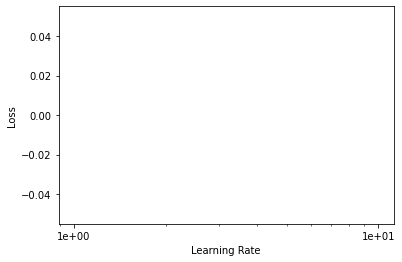

In [ ]:
#auto-learning rate finder, works sometime ......but not always
learn.lr_find() 
learn.recorder.plot(suggestion=True)

In [ ]:
#TRAINING Further for 6 EPOCHS
learn.fit_one_cycle(6 ,slice((3e-05)/10))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.001461,0.021122,0.994800,0.005200,07:10
1,0.006194,0.021576,0.994800,0.005200,07:12
2,0.010461,0.020836,0.994800,0.005200,07:14
3,0.001288,0.018717,0.994800,0.005200,07:15
4,0.004386,0.019417,0.995600,0.004400,07:16
5,0.003312,0.019978,0.995600,0.004400,07:15


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
#saving model
learn.save('stage2_99.56')

In [ ]:
#unfreezing the whole model and training more epochs
learn.unfreeze()
learn.fit_one_cycle(8, slice((3e-05)/100))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.001674,0.019419,0.995600,0.004400,07:11
1,0.001723,0.019023,0.996000,0.004000,07:13
2,0.004089,0.019536,0.995600,0.004400,07:14
3,0.002955,0.019359,0.994800,0.005200,07:16
4,0.002927,0.020110,0.994800,0.005200,07:13
5,0.002132,0.020243,0.995200,0.004800,07:15
6,0.004144,0.019845,0.996000,0.004000,07:18
7,0.002269,0.019992,0.995600,0.004400,07:19


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
#now we need to make csv file for test images and then we will save 
#now prediction time
#open up the csv file which contains the directories names of test images
test_df=pd.read_csv('sampleSubmission.csv')

In [ ]:
test_df

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,0


In [ ]:
all_test_images_list=glob.glob('data/test1/*.jpg')

In [ ]:
all_test_images_list[0:5]

['data/test1/2341.jpg',
 'data/test1/12338.jpg',
 'data/test1/9919.jpg',
 'data/test1/7705.jpg',
 'data/test1/1760.jpg']

In [ ]:
import natsort

In [ ]:
all_test_images_list=natsort.natsorted(all_test_images_list)

In [ ]:
all_test_images_list[0:5]

['data/test1/1.jpg',
 'data/test1/2.jpg',
 'data/test1/3.jpg',
 'data/test1/4.jpg',
 'data/test1/5.jpg']

In [ ]:
#prediction ftn which takes a image ,passes it through the model , and saves the results in stack formation
#in the variable final_stacked_result
def get_all_predictions():
  
  final_stacked_result=None
  for batch in range(len(all_test_images_list)):
         my_image=open_image(all_test_images_list[batch])
         predictions = learn.predict(my_image)[2].reshape(1,-1)
#          predictions=my_network(batch.to(device))
#          test_prediction=predictions.data.cpu()
         if final_stacked_result is None:
            final_stacked_result=predictions
            
         else:
             final_stacked_result=torch.cat((final_stacked_result,predictions),dim=0)
  return final_stacked_result

#calling the function 
my_predictions=get_all_predictions()

In [ ]:
y=my_predictions.argmax(dim=1)

In [ ]:
#now just save the results in the csv file
final_csv_with_labels_uploaded=test_df
final_csv_with_labels_uploaded['label']=y

In [ ]:
final_csv_with_labels_uploaded

,id,label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,1
12498,12499,1


In [ ]:
final_csv_with_labels_uploaded

,id,label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,1
12498,12499,1


In [ ]:
final_csv_with_labels_uploaded['label'][9]

0

In [ ]:
final_csv_with_labels_uploaded.to_csv('fastaiefficientNet99.56_256.csv',index=False)

In [ ]:
!pwd

/content


In [ ]:
#saving our model files as well
learn.load('stage2_99.56')

Learner(data=ImageDataBunch;

Train: LabelList (22500 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
dog,dog,dog,cat,dog
Path: data;

Valid: LabelList (2500 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
cat,dog,dog,dog,dog
Path: data;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, ep

In [ ]:
learn.export('/content/stage2_99.56.pkl')

In [ ]:
!pwd

/content
